# Titanic Predictive Model

**Objective**: use machine learning to create a model that predicts which passengers survived the Titanic 

**Results**:

    - using Ada Boost Classifier model we found Accuracy = 0.7966; F1 = 0.7459

In [12]:
#import librarys
from datetime import datetime
import pickle

import pandas as pd
from pycaret.classification import setup, compare_models, create_model, tune_model, finalize_model, plot_model, save_model

In [15]:
DATA_PATH = '/home/wedeueis/Projetos/Artefact/Meetup/titanic/data/'

TRAIN_FILE = 'processed/train_model_input_with_dummies.csv'
MODEL_FILE = '../models/predictive_pipeline'

In [5]:
#getting data
train = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILE))
train.set_index("PassengerId", inplace=True)
train.head()

,Age,SibSp,Parch,Fare,Alone,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q,Survived
PassengerId,,,,,,,,,,,
1,22.0,1,0,7.2500,1,0,0,0,0,0,0
2,38.0,1,0,71.2833,1,1,0,1,1,0,1
3,26.0,0,0,7.9250,0,0,0,1,0,0,1
4,35.0,1,0,53.1000,1,1,0,1,0,0,1
5,35.0,0,0,8.0500,0,0,0,0,0,0,0


In [6]:
#ML COM PYCARET
model_setup = setup(data = train,
                  target = 'Survived',
                  numeric_features = ['Age','Fare', 'SibSp','Parch'],
                  train_size = 0.75,
                  normalize = True,
                  ignore_low_variance = True,
                  combine_rare_levels = True,
                  remove_multicollinearity = True,
                  feature_selection = True,
                  fold_strategy = 'stratifiedkfold',
                  fold = 10)

,Description,Value
0,session_id,6691
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 11)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,0
9,High Cardinality Features,0


In [7]:
#choosing the best ML model
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8128,0.8642,0.7152,0.7962,0.7511,0.6020,0.6065,0.0700
lightgbm,Light Gradient Boosting Machine,0.8114,0.8585,0.7346,0.7794,0.7544,0.6018,0.6043,0.0390
ada,Ada Boost Classifier,0.8098,0.8478,0.7417,0.7757,0.7549,0.6000,0.6038,0.0650
lr,Logistic Regression,0.8054,0.8595,0.6925,0.7944,0.7375,0.5842,0.5899,0.6590
lda,Linear Discriminant Analysis,0.8009,0.8599,0.6926,0.7838,0.7326,0.5753,0.5808,0.0080
qda,Quadratic Discriminant Analysis,0.7995,0.8539,0.7348,0.7538,0.7419,0.5786,0.5809,0.0200
ridge,Ridge Classifier,0.7994,0.0000,0.6887,0.7828,0.7303,0.5719,0.5772,0.0100
knn,K Neighbors Classifier,0.7964,0.8391,0.7383,0.7518,0.7409,0.5739,0.5780,0.0290
nb,Naive Bayes,0.7874,0.8342,0.7383,0.7331,0.7327,0.5568,0.5600,0.0090
rf,Random Forest Classifier,0.7829,0.8544,0.7041,0.7362,0.7180,0.5420,0.5441,0.2190


In [8]:
#tunning model
model_tunned = tune_model(model, optimize = 'F1', n_iter = 15)

In [9]:
final_model = finalize_model(model_tunned)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


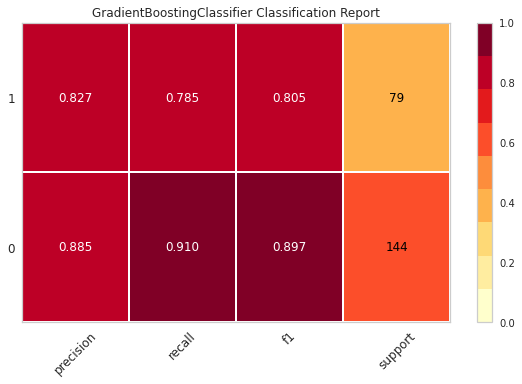

In [10]:
plot_model(final_model, plot = 'class_report')

In [17]:
save_model(final_model, os.path.join(DATA_PATH, MODEL_FILE))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Age', 'Fare',
                                                           'SibSp', 'Parch'],
                                       target='Survived', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_valu...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=8, max_features='sqrt',
                                             max_leaf_nodes=None,
                   